# Akbank Deep Learning Bootcamp: Fish Classification Project

This project aims to develop a deep learning model for classifying fish species using the [A Large Scale Fish Dataset](https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset) from Kaggle.

Dataset: https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset

Github: https://github.com/ozgurulasayhan/akbank-derin-ogrenme-bootcamp-2024

# 1. Data Preprocessing

## 1.1. Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

##  1.2. Define Dataset

In [2]:
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 
classes = [i for i in os.listdir(fish_dir) if '.' not in i]                    
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [3]:
label = []
path = []

for dir_name, _,filenames in os.walk(fish_dir):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dir_name.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dir_name)[-1])         # Append the directory name to label 
                path.append(os.path.join(dir_name,filename))     # Append all the png files to path of that directory

data = pd.DataFrame(columns=['path','label'])
data['path']=path
data['label']=label

## 1.2. Display the first few rows, basic information and visualization

In [4]:
print(data.head())
print(data.info())
print(data['label'].value_counts())

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB
None
label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64


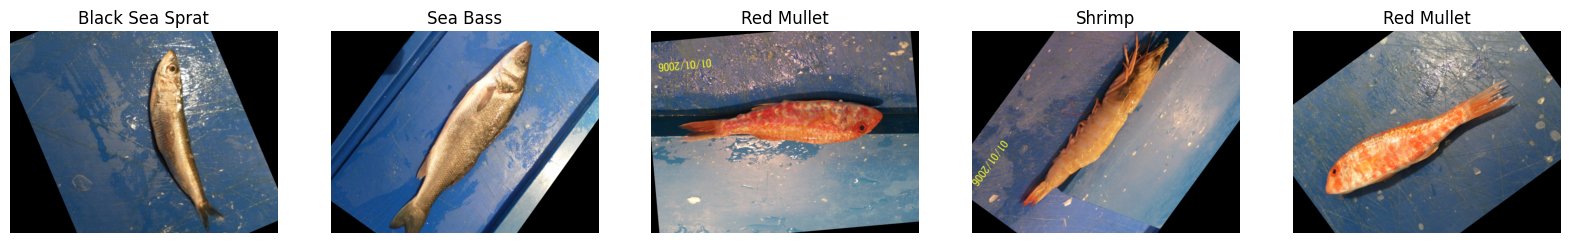

In [5]:
def plot_sample_images(data, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i in range(num_samples):
        sample = data.sample().iloc[0]
        img = load_img(sample['path'])
        axes[i].imshow(img)
        axes[i].set_title(sample['label'])
        axes[i].axis('off')
    plt.show()

plot_sample_images(data)

## 2. Model Training

### 2.1. Split data

In [6]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

### 2.2. Function to load and preprocess images

In [7]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalize pixel values

### 2.3. Prepare X and y

In [8]:
# Prepare X_train and y_train
X_train = np.array([load_and_preprocess_image(path) for path in train_data['path']])
y_train = pd.get_dummies(train_data['label']).values

# Prepare X_test and y_test
X_test = np.array([load_and_preprocess_image(path) for path in test_data['path']])
y_test = pd.get_dummies(test_data['label']).values

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (7200, 224, 224, 3)
Test set shape: (1800, 224, 224, 3)


# 3. Model Development

## 3.1. Define and Compile the Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3.1. Train the Model

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20


I0000 00:00:1729169656.335973     103 service.cc:145] XLA service 0x7c6650108db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729169656.336035     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729169656.336041     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  5/180 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.0881 - loss: 2.5645

I0000 00:00:1729169662.711405     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


180/180 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.2539 - loss: 1.9947 - val_accuracy: 0.7243 - val_loss: 0.9219
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.6447 - loss: 0.9742 - val_accuracy: 0.8681 - val_loss: 0.4191
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7595 - loss: 0.6506 - val_accuracy: 0.9111 - val_loss: 0.3101
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.8327 - loss: 0.4777 - val_accuracy: 0.9361 - val_loss: 0.2101
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.8724 - loss: 0.3608 - val_accuracy: 0.9549 - val_loss: 0.1444
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.8833 - loss: 0.3059 - val_accuracy: 0.9611 - val_loss: 0.1339
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9084 - loss: 0.2496 - val_accuracy: 0.9604 - val_loss: 0.1144
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9026 - loss: 0.2554 - val_accuracy: 0.95

# 4. Model Evaluation

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9855 - loss: 0.0531
Test accuracy: 0.9850


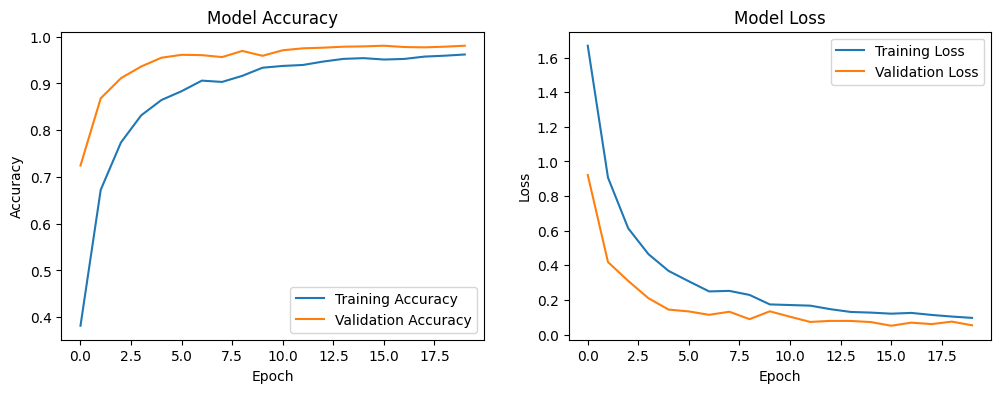

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
                    precision    recall  f1-score   support

   Hourse Mackerel       0.97      1.00      0.99       200
   Black Sea Sprat       0.99      0.99      0.99       200
          Sea Bass       0.98      0.98      0.98       200
        Red Mullet       0.97      0.98      0.98       200
             Trout       1.00      1.00      1.00       200
Striped Red Mullet       0.99      0.97      0.98       200
            Shrimp       0.98      0.98      0.98       200
   Gilt-Head Bream       0.99      0.95      0.97       200
     Red Sea Bream       0.99      0.99      0.99       200

          accuracy                           0.98      1800
         macro avg       0.99      0.98      0.98      1800
      weighted avg       0.99      0.98      0.98      1800



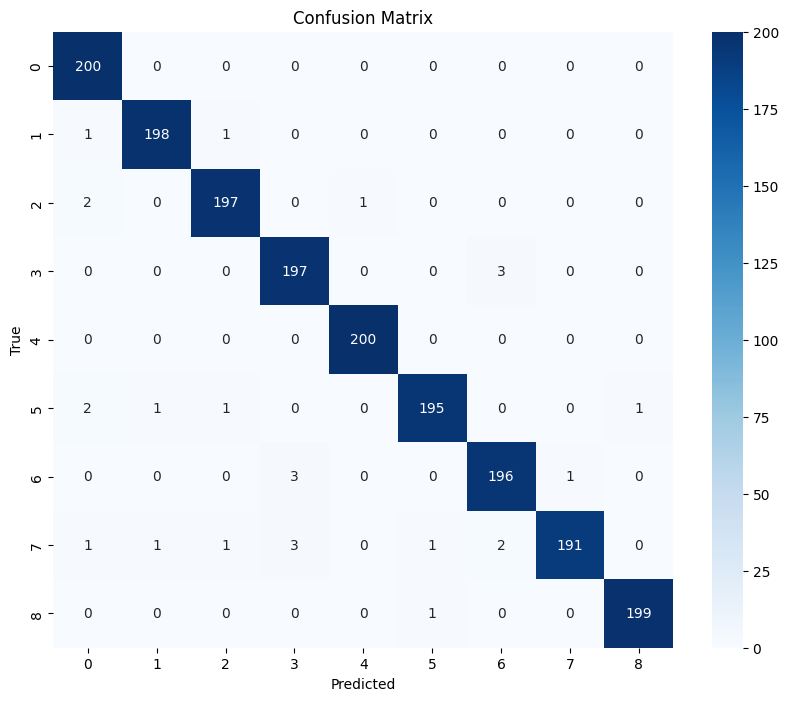

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=data['label'].unique()))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 5. Hyperparameter Optimization

In [12]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=32),
                     (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(2, 2))
    
    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(Conv2D(hp.Int(f'conv{i+2}_units', min_value=32, max_value=128, step=32),
                         (3, 3), activation='relu'))
        model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())
    
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(hp.Int(f'dense{i+1}_units', min_value=32, max_value=256, step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float(f'dropout{i+1}', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='hyper_tuning',
    project_name='fish_classification'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best model test accuracy: {test_accuracy:.4f}")

Trial 10 Complete [00h 05m 13s]
val_accuracy: 0.9798611402511597

Best val_accuracy So Far: 0.9902777671813965
Total elapsed time: 00h 45m 45s


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters:
{'conv1_units': 128, 'num_conv_layers': 1, 'conv2_units': 32, 'num_dense_layers': 3, 'dense1_units': 128, 'dropout1': 0.4, 'learning_rate': 0.0004224094404017299, 'conv3_units': 64, 'dense2_units': 224, 'dropout2': 0.1, 'dense3_units': 32, 'dropout3': 0.0}
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9778 - loss: 0.0912
Best model test accuracy: 0.9839
